In [40]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv('Product_data.csv')

In [42]:
data.head()

,everyday,productid,productname,quantity
0,2023-08-16,D_10006,CURD - 200 G,60.0
1,2023-08-16,D_10029,STANDARDISED MILK - 500 ml,48.0
2,2023-08-16,D_10006,CURD - 200 G,60.0
3,2023-08-16,D_10017,DOUBLE TONED MILK - 500 ml,72.0
4,2023-08-16,D_10033,TONED MILK - 500 ml,24.0


In [43]:
data.shape

(2516944, 4)

In [44]:
# Filter for product ID D_10006
df_filtered = data[data['productid'] == 'D_10006']

In [45]:
# Group by date and sum quantity
df_grouped = df_filtered.groupby('everyday')['quantity'].sum().reset_index()

In [46]:
#everyday datatype changed into datetime
df_grouped['everyday']= pd.to_datetime(df_grouped['everyday'])

In [47]:
print(df_grouped)

      everyday  quantity
0   2022-10-01    8760.0
1   2022-10-02    9720.0
2   2022-10-03   11820.0
3   2022-10-04   12720.0
4   2022-10-05   11880.0
..         ...       ...
319 2023-08-17    8580.0
320 2023-08-18    7380.0
321 2023-08-19    6720.0
322 2023-08-20    8100.0
323 2023-08-21    7860.0

[324 rows x 2 columns]


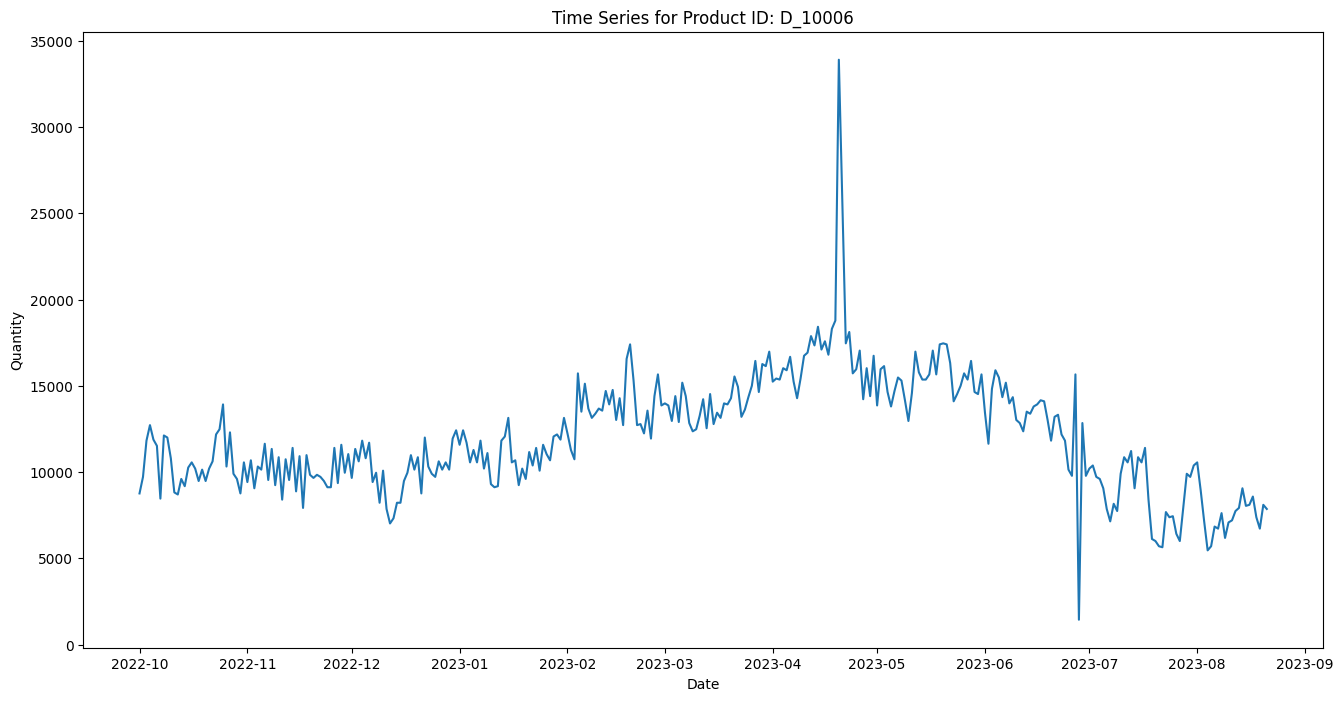

In [48]:
# Assuming df_product has columns 'date' and 'quantity'
plt.figure(figsize=(16,8))
plt.plot(df_grouped['everyday'], df_grouped['quantity'])
plt.title(f'Time Series for Product ID: D_10006')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10900\1484860873.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




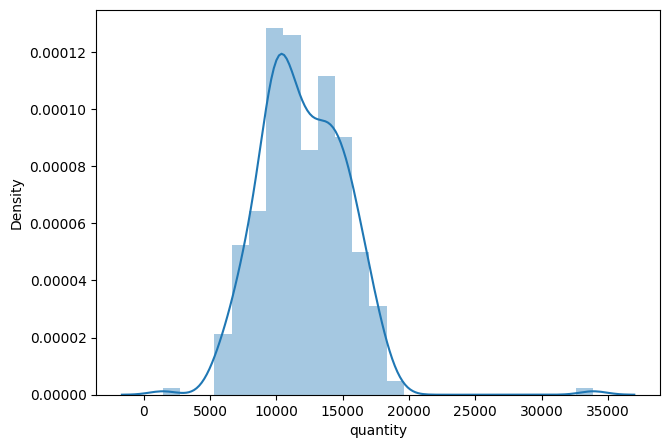

In [49]:
#detecting outlier in Quantity Columns Using Z Score Technique
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df_grouped['quantity'])
plt.show()

In [50]:
df_grouped['quantity'].skew()

0.8555494440417836

In [51]:
print("Mean vlaue of Quantity", df_grouped['quantity'].mean())
print("Std vlaue of Quantity", df_grouped['quantity'].std())
print("Min vlaue of Quantity", df_grouped['quantity'].min())
print("Max vlaue of Quantity", df_grouped['quantity'].max())

Mean vlaue of Quantity 12007.962962962964
Std vlaue of Quantity 3266.491786772356
Min vlaue of Quantity 1440.0
Max vlaue of Quantity 33900.0


In [52]:
# Finding the boundary values
print("Highest allowed", df_grouped['quantity'].mean() + 3*df_grouped['quantity'].std())
print("Lowest allowed", df_grouped['quantity'].mean() - 3*df_grouped['quantity'].std())

Highest allowed 21807.438323280032
Lowest allowed 2208.487602645895


In [53]:
# Finding the outliers
df_grouped[(df_grouped['quantity'] > 21807.43) | (df_grouped['quantity'] < 2208.48)]

,everyday,quantity
201,2023-04-20,33900.0
269,2023-06-28,1440.0


In [54]:
new_df = df_grouped[(df_grouped['quantity'] < 21807.43) & (df_grouped['quantity'] > 2208.48)]
new_df

,everyday,quantity
0,2022-10-01,8760.0
1,2022-10-02,9720.0
2,2022-10-03,11820.0
3,2022-10-04,12720.0
4,2022-10-05,11880.0
...,...,...
319,2023-08-17,8580.0
320,2023-08-18,7380.0
321,2023-08-19,6720.0
322,2023-08-20,8100.0


In [55]:
# Convert the DataFrame to CSV
new_df.to_csv('new_df.csv', index=False)

print("CSV file 'new_df_with_forecast.csv' has been created successfully.")

CSV file 'new_df_with_forecast.csv' has been created successfully.


C:\Users\User\AppData\Local\Temp\ipykernel_10900\3982875508.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




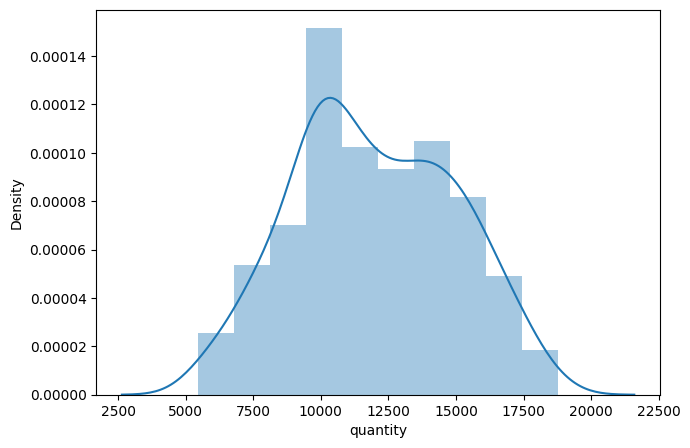

In [56]:
# Plot the time series data
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(new_df['quantity'])
plt.show()

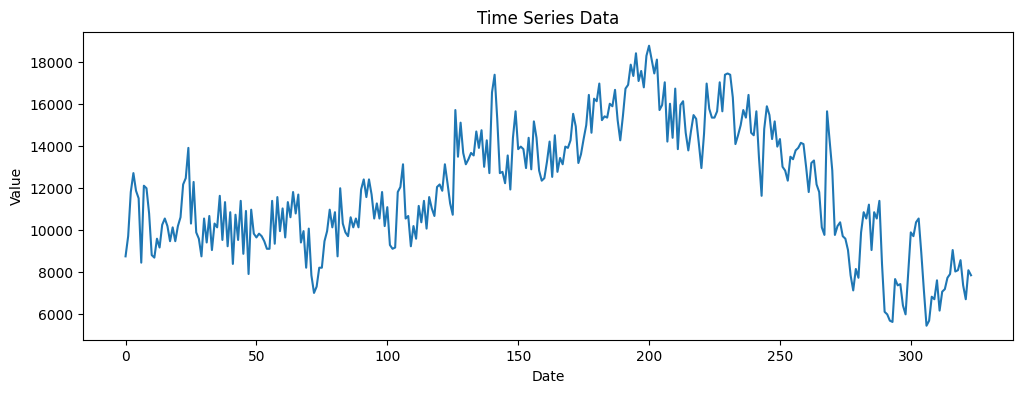

In [57]:
# Plot the time series data
plt.figure(figsize=(12, 4))
plt.plot(new_df['quantity'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [58]:
m = Prophet()
new_df.columns = ['ds','y']

In [59]:
model = m.fit(new_df)

05:54:51 - cmdstanpy - INFO - Chain [1] start processing
05:54:51 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
future = m.make_future_dataframe(periods=90, freq='D')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
407,2023-11-15,-2207.749007,-4876.419280,92.970016,-3780.674486,-606.257933,-157.363286,-157.363286,-157.363286,-157.363286,-157.363286,-157.363286,0.0,0.0,0.0,-2365.112293
408,2023-11-16,-2305.807253,-4874.386478,-305.445874,-3907.437678,-658.941154,-356.872021,-356.872021,-356.872021,-356.872021,-356.872021,-356.872021,0.0,0.0,0.0,-2662.679274
409,2023-11-17,-2403.865500,-5430.628617,-556.995538,-4036.284181,-740.536603,-465.148800,-465.148800,-465.148800,-465.148800,-465.148800,-465.148800,0.0,0.0,0.0,-2869.014300
410,2023-11-18,-2501.923746,-4988.490748,46.246608,-4159.193116,-824.860757,127.704882,127.704882,127.704882,127.704882,127.704882,127.704882,0.0,0.0,0.0,-2374.218864
411,2023-11-19,-2599.981993,-4693.364811,127.693238,-4293.390192,-909.401941,340.849589,340.849589,340.849589,340.849589,340.849589,340.849589,0.0,0.0,0.0,-2259.132404


In [61]:
forecast.tail(25)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
387,2023-10-26,-246.584077,-2619.069229,1456.719548,-1276.191322,800.719576,-356.872021,-356.872021,-356.872021,-356.872021,-356.872021,-356.872021,0.0,0.0,0.0,-603.456097
388,2023-10-27,-344.642323,-2989.110932,1034.959663,-1392.512991,734.278274,-465.148800,-465.148800,-465.148800,-465.148800,-465.148800,-465.148800,0.0,0.0,0.0,-809.791124
389,2023-10-28,-442.700570,-2578.657835,1849.625903,-1509.911361,653.527722,127.704882,127.704882,127.704882,127.704882,127.704882,127.704882,0.0,0.0,0.0,-314.995687
390,2023-10-29,-540.758816,-2341.721250,1923.706923,-1617.744299,580.292737,340.849589,340.849589,340.849589,340.849589,340.849589,340.849589,0.0,0.0,0.0,-199.909227
391,2023-10-30,-638.817063,-2603.520949,1960.215375,-1740.261740,524.674763,320.990221,320.990221,320.990221,320.990221,320.990221,320.990221,0.0,0.0,0.0,-317.826842
392,2023-10-31,-736.875309,-2624.794112,1532.153303,-1872.641136,456.052549,189.839415,189.839415,189.839415,189.839415,189.839415,189.839415,0.0,0.0,0.0,-547.035895
393,2023-11-01,-834.933556,-3232.199366,1101.460274,-2010.658301,380.588363,-157.363286,-157.363286,-157.363286,-157.363286,-157.363286,-157.363286,0.0,0.0,0.0,-992.296842
394,2023-11-02,-932.991802,-3373.306359,987.216270,-2138.129260,305.321182,-356.872021,-356.872021,-356.872021,-356.872021,-356.872021,-356.872021,0.0,0.0,0.0,-1289.863823
395,2023-11-03,-1031.050049,-3545.180209,804.804984,-2263.140817,233.098298,-465.148800,-465.148800,-465.148800,-465.148800,-465.148800,-465.148800,0.0,0.0,0.0,-1496.198849
396,2023-11-04,-1129.108295,-3330.404646,1101.470770,-2383.720515,162.111708,127.704882,127.704882,127.704882,127.704882,127.704882,127.704882,0.0,0.0,0.0,-1001.403413


In [62]:
forecast_values.head()

0    10092.955062
1    10311.953217
2    10297.947296
3    10172.649938
4     9831.300685
Name: yhat, dtype: float64

In [63]:
forecast['yhat'].sum()

4014041.8149083187

In [64]:
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go

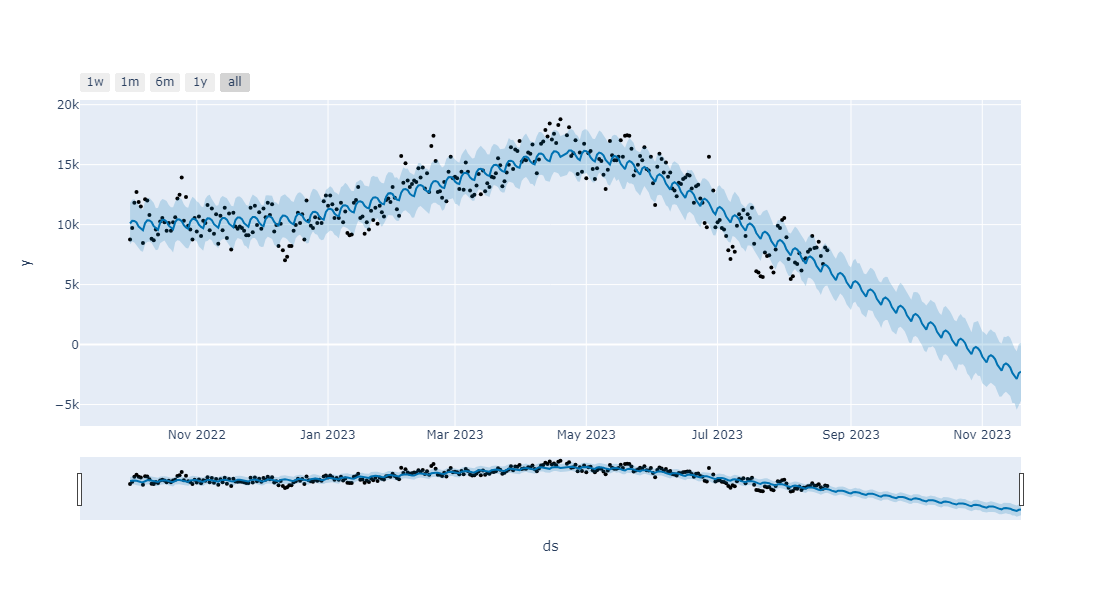

In [65]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

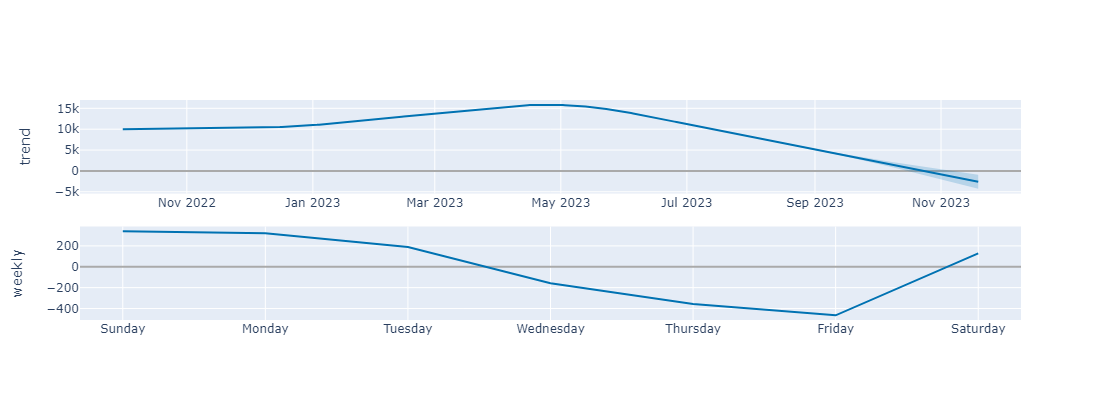

In [66]:
plot_components_plotly(m, forecast)

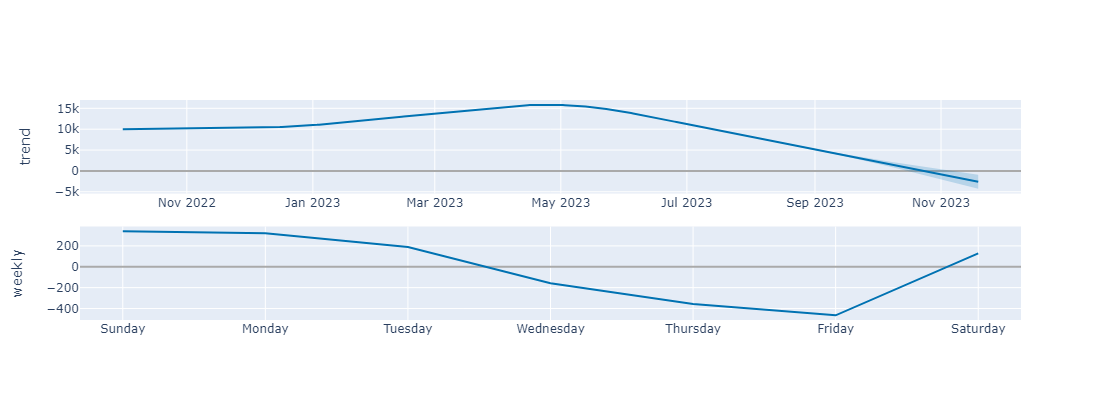

In [67]:
plot_components_plotly(m, forecast)

In [68]:
forecast_dates = forecast['ds']  # Extract the forecast dates
forecast_values = forecast['yhat']  # Extract the forecasted values

In [69]:
# Concatenate new_df with forecast_values as a new column
new_df_forecast = pd.concat([new_df, forecast_values], axis=1)

In [70]:
# Rename the forecast_values column if needed
new_df_forecast.rename(columns={'yhat':'forecast_quantity'}, inplace=True)

In [71]:
new_df_forecast.tail(25)

,ds,y,forecast_quantity
387,NaT,NaN,-603.456097
388,NaT,NaN,-809.791124
389,NaT,NaN,-314.995687
390,NaT,NaN,-199.909227
391,NaT,NaN,-317.826842
392,NaT,NaN,-547.035895
393,NaT,NaN,-992.296842
394,NaT,NaN,-1289.863823
395,NaT,NaN,-1496.198849
396,NaT,NaN,-1001.403413


In [72]:
# Option 3: MAPE (Mean Absolute Percentage Error)
import numpy as np
from math import fabs
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.clip(y_true, np.min(y_pred), np.max(y_pred))  # Clip to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / y_true) * 100)
mape = mean_absolute_percentage_error(new_df['y'], forecast_values)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 10.16%


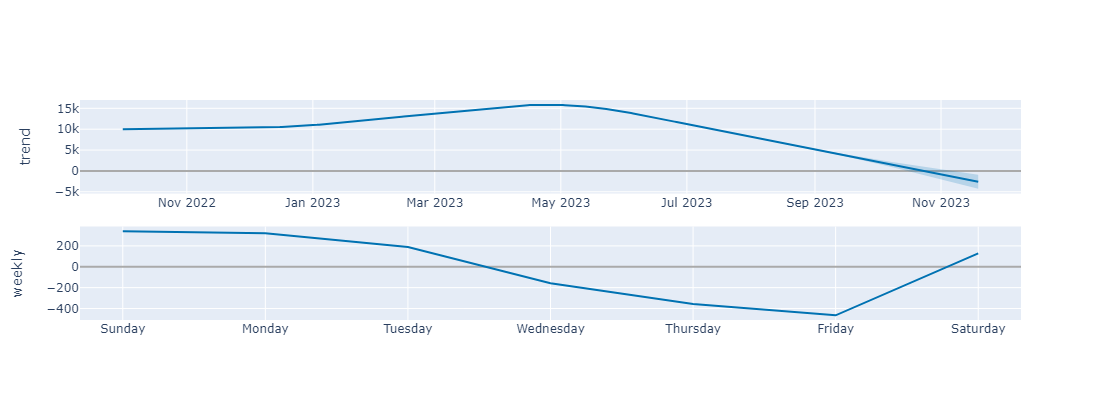

In [73]:
from prophet.plot import plot_plotly, plot_components_plotly

# ... other code ...

plot_plotly(m, forecast)  # This line creates the forecast plot
plot_components_plotly(m, forecast)  # This line creates a plot with decomposed components

In [ ]:
print(new_df_forecast)

In [ ]:
# Convert the DataFrame to CSV
new_df_forecast.to_csv('new_df_forecast2.csv', index=False)

print("CSV file 'new_df_with_forecast.csv' has been created successfully.")